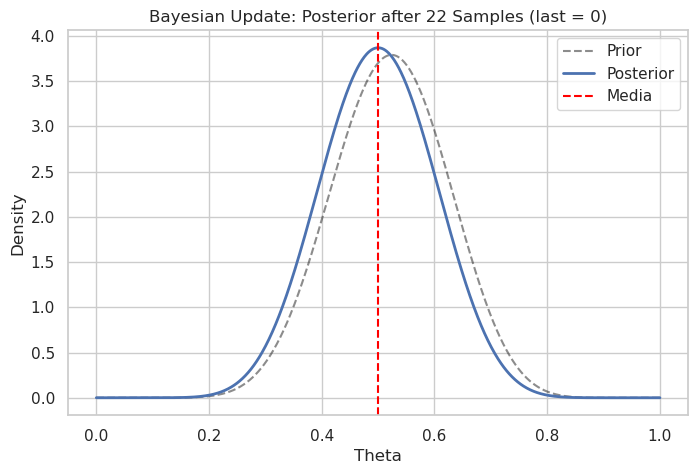

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import beta
import time
from IPython.display import clear_output

# Configuración de estilo
sns.set(style="whitegrid")

# Prior uniforme (Beta(1,1) es un prior uniforme en [0, 1])
alpha_prior = 1
beta_prior = 1

# Muestras
samples = np.array([0] + [1]*6 + [0,1]*5 + [0]*5)

# Crear un espacio de probabilidad
x = np.linspace(0, 1, 1000)

# Función para graficar el proceso de actualización bayesiana
def plot_update(i, sample, prior_dist, posterior_dist, mean):
    clear_output(wait=True)  # Limpiar la salida del notebook
    plt.figure(figsize=(8, 5))
    plt.plot(x, prior_dist, 'k--', alpha=0.5, label="Prior")  # Prior en dashed, gris
    plt.plot(x, posterior_dist, 'b-', linewidth=2, label="Posterior")  # Posterior en línea sólida
    plt.axvline(x=mean, color='red', linestyle='dashed', label='Media')
    plt.title(f'Bayesian Update: Posterior after {i+1} Samples (last = {sample})')
    plt.xlabel('Theta')
    plt.ylabel('Density')
   
    plt.legend()
    plt.show()
    time.sleep(5)

# Recorrer el array de muestras y hacer la actualización Bayesiana
alpha_post = alpha_prior
beta_post = beta_prior

for i, sample in enumerate(samples):
    # Definir la distribución prior y posterior con los parámetros actuales
    prior_dist = beta.pdf(x, alpha_post, beta_post)

    # Actualizar el posterior según la muestra observada
    alpha_post += sample  # Incrementar el conteo de éxitos si es 1
    beta_post += (1 - sample)  # Incrementar el conteo de fracasos si es 0

    # Calcular el promedio hasta el momento
    mean = samples[:i+1].mean()

    # Calcular la nueva distribución posterior
    posterior_dist = beta.pdf(x, alpha_post, beta_post)

    # Graficar el prior y el posterior
    plot_update(i, sample, prior_dist, posterior_dist, mean)
